In [4]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [5]:
EXPERIMENTS_NUM = 100
ALPHAS = [0.1, 0.5, 1, 2, 5]

In [6]:
def calculate_time_two_customers(alpha, windows_amount, queue_size):
    return np.sort(np.random.exponential(1/alpha, windows_amount))

def calculate_time_several_customers(alpha, windows_amount, queue_size):
    time_list = calculate_time_two_customers(alpha, windows_amount, queue_size).tolist()
    heapq.heapify(time_list)
    customers_queue = np.arange(1, queue_size + 1)
    times = [get_waiting_time(time_list, alpha) for _ in customers_queue]
    return np.array(times)

def get_waiting_time(heap, alpha):
    min_time = heapq.heappop(heap)
    new_time = min_time + np.random.exponential(alpha)
    heapq.heappush(heap, new_time)
    return min_time

In [7]:
def get_mean_waiting_time(alpha, queue_size, windows_amount, calculate_time):
    experiments = np.arange(EXPERIMENTS_NUM)
    time_in_all_experiments = [calculate_time(alpha, queue_size, windows_amount) for _ in experiments]
    mean_waiting_time = sum(time_in_all_experiments) / EXPERIMENTS_NUM
    return mean_waiting_time

In [8]:
def draw_graph_two_customers(alphas: np.array, windows_amount):
    legends = []
    X = np.arange(1, windows_amount + 1)
    Y = [get_mean_waiting_time(alpha, windows_amount, windows_amount, calculate_time_two_customers) for alpha in alphas]
    for i, y in enumerate(Y):
        plt.plot(X, y)
        legends.append("alpha=" + str(alphas[i]))
    plt.legend(legends)  
    plt.ylabel("waiting time")
    plt.grid()   
    plt.title(str(windows_amount) + " windows, " + str(windows_amount) + " people in queue")
    plt.show()

In [9]:
def draw_graph_several_customers(alphas: np.array, windows_amount, queue_size):
    legends = []
    X = np.arange(1, queue_size + 1)
    Y = [get_mean_waiting_time(alpha, windows_amount, queue_size, calculate_time_several_customers) for alpha in alphas]
    for i, y in enumerate(Y):
        plt.plot(X, y)
        legends.append("alpha=" + str(alphas[i]))
    plt.legend(legends)  
    plt.ylabel("waiting time")
    plt.grid()   
    plt.title(str(windows_amount) + " windows, " + str(queue_size) + " people in queue")
    plt.show()

## Задача A

Каждое окошко может принять не более двух человек, значит, если окошек будет $n$, 
то количество человек, которых надо обслужить не может превышать $2n$, так как иначе часть просто не хватит окон

Первые $n$ человек ждать совсем не будут, потому что окошки свободны. Для оставшихся $n$ человек построим графики заивисмости времени ожидания от позиции в очереди.

Время обслуживания одного человека - случайная величина с показательным распределением с параметром $\alpha$, тогда если $X_1, \dots, X_n \sim Exp(\alpha)$, то первый из ждущих в очереди людей подойдет к окошку по прошествии времени $X_{(1)}$, второй когда пройдет время $X_{(2)}$, и так далее, где $X_{(k)}$ - $k$-ая порядковая статистика

### Постановка эксперимента:

1) Генерируем выборку $X_1, \dots, X_n$, соответствующую времени обслуживания первых $n$ человек

2) Сортируем полученную выборку, получем время ожидания для каждого человека в очереди

2) Повторяем действия 1 и 2 несколько раз, потом для каждого человека вычисляем среднее время ожидания


### Ниже приведены полученные графики:

на них меняется параметр $\alpha$, а так же количество окон (и количество человек в очереди)

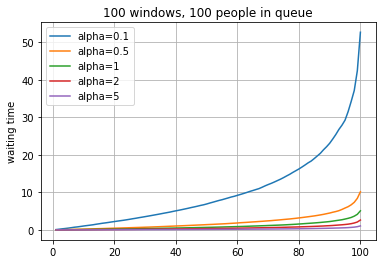

In [10]:
draw_graph_two_customers(ALPHAS, 100)

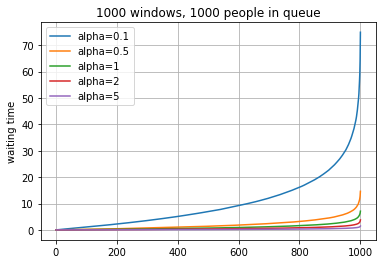

In [11]:
draw_graph_two_customers(ALPHAS, 1000)

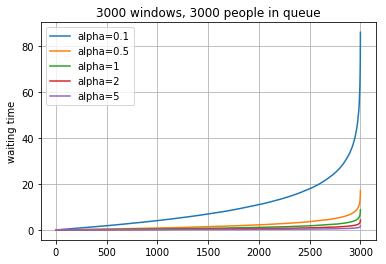

In [12]:
draw_graph_two_customers(ALPHAS, 3000)

### Выводы:

Из графиков видно, что зависимость похожа на экспоненциальную, кроме того понятно, что чем меньше параметр $\alpha$, тем меньше будет время ожидания, а так же видно, что при увеличении количсетва человек в очереди (и количества окон на нужное) время ожидания последнего человека увеличиватся, но не очегь сильно

## Задача B

Так как теперь одно окно может обслужить любое количество людей, то раз мер очереди спокойно может превышать количество окон $n$

Рассмотрим $i$-го человека в очереди. Пусть для него освободилось окошко и перед этим он ждал $t$ времени. Тогда следующий человек подойдет к этому окошку через время, равное ($t \;+ \; X_i$), где $X_i \sim Exp(\alpha)$ - время обслуживания $i$-го человека.

Тогда первому человеку в очереди (то есть тому, которого обслужат $(n+1)$-ым) придется подождать время, $X_{(1)}$,
второму $min(X_{(2)}, X_{(1)} + X_{n + 1})$ и так далее 

### Постановка эксперимента:

1) Генерируем выборку $X_1, \dots, X_n$, соответствующую времени обслуживания первых $n$ человек

2) Для каждого человека в очереди получаем минимальное время, через которое он может подойти к окну, убираем это время из списка времен ожидания, полученного из выборки из аункта 1

3) Добавляем в выборку (время ожидания этого человека + время обслуживания)

4) Повторяем действия 1-3 несколько раз, потом для каждого человека вычисляем среднее время ожидания


### Ниже приведены полученные графики:

на них меняется параметр $\alpha$, а так же количество окон и количество человек в очереди, два последних параметра не зависят друг от друга

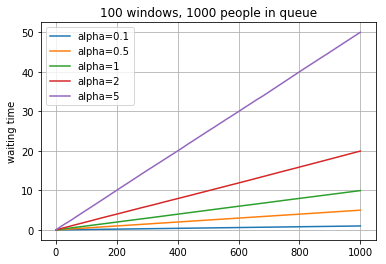

In [253]:
draw_graph_several_customers(ALPHAS, 100, 1000)

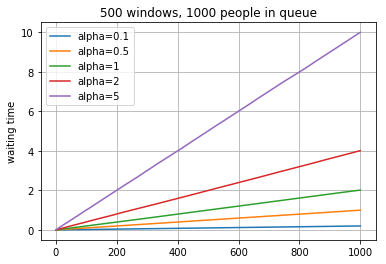

In [254]:
draw_graph_several_customers(ALPHAS, 500, 1000)

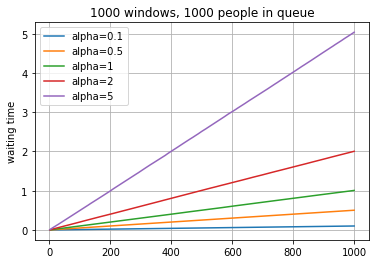

In [255]:
draw_graph_several_customers(ALPHAS, 1000, 1000)

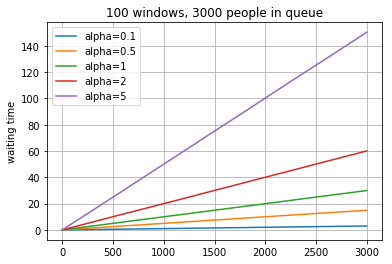

In [256]:
draw_graph_several_customers(ALPHAS, 100, 3000)

### Выводы
Из графиков видно, что зависимость линейная, чем больше параметр $\alpha$, тем дольше будет время ожидания при остальный одинаковых параметрах.

При этом если посмотреть на время ожидания в данной задаче и в задаче А при одинаковых параметрах "количество окон" и "количество людей в очереди", то видно, что время ожидания начиная с какой то позиции в очереди будет меньше, если окна могут принимать неограниченное число человек

Ниже можно увидеть это на графике

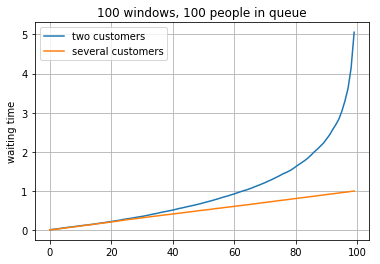

In [257]:
n = 100
X = np.arange(n)
A = get_mean_waiting_time(1, n, n, calculate_time_two_customers)
B = get_mean_waiting_time(1, n, n, calculate_time_several_customers)
plt.plot(X, A, label="two customers")
plt.plot(X, B, label="several customers")
plt.legend()
plt.title(str(n) + " windows, " + str(n) + " people in queue")
plt.ylabel("waiting time")
plt.grid()